In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma
from scipy import integrate

## Stima dei parametri utlizzando il metodo dei minimi quadrati

In [2]:
dati = np.genfromtxt("DatiEsercitazione1.txt", delimiter = " ")
#print(dati)


In [3]:
def mmq(matrix):
    S00 = np.float64(0)
    S01 = np.float64(0)
    S10 = np.float64(0)
    S11 = np.float64(0)
    S20 = np.float64(0)

    S00 = sum(1.0/(matrix[:,2])**2)
    S01 = sum((matrix[:,1]/(matrix[:,2])**2))
    S10 = sum(matrix[:,0]/(matrix[:,2])**2)
    S11 = sum(matrix[:,0]*matrix[:,1]/(matrix[:,2])**2)
    S20 = sum((matrix[:,0]/(matrix[:,2]))**2)

    D = S00*S20 - S10**2
    m = (S00*S11 - S10*S01)/D
    q = (S01*S20 - S11*S10)/D
    stdm = np.sqrt(S00/D)
    stdq = np.sqrt(S20/D)
    cov = -(S10)/D

    return (m, stdm, q, stdq, cov)


In [4]:
fit = lambda x : np.float64(m)*x + q

m, stdm, q, stdq, cov =  mmq(dati)

print(f"m: {m} +- {stdm}")
print(f"q: {q} +- {stdq}")
print(f"cov: {cov}")

m: 21.249507107882245 +- 1.6260370682843663
q: -1.318441943639511 +- 2.2928744006498216
cov: -2.9639983881548755


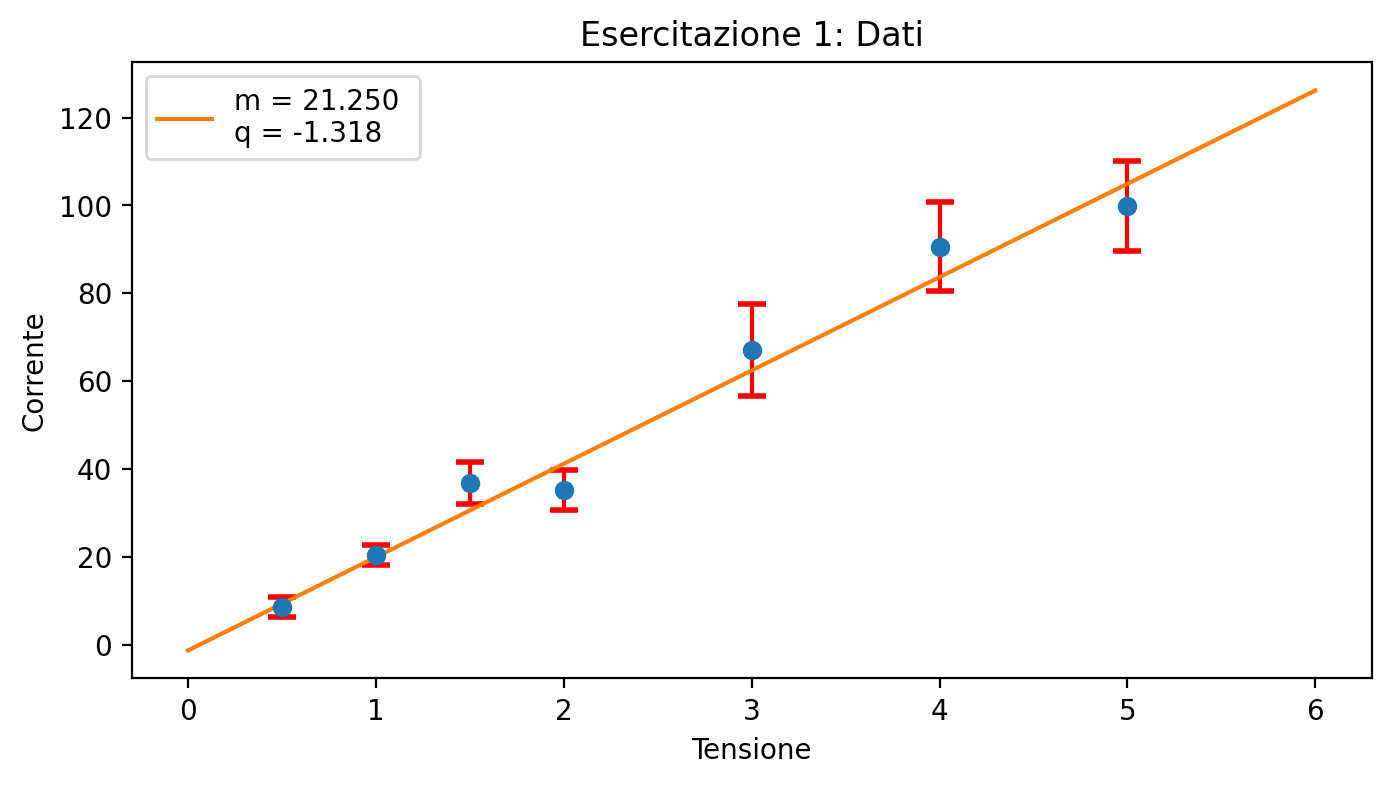

In [5]:
x, y, stdy = zip(*dati)
x = np.float64(x)
y = np.float64(y)
plt.figure(figsize=(8, 4), dpi=200)

# Plot the points
plt.errorbar(x, y, yerr=stdy, fmt='o', ecolor='red', capsize=5, capthick=2, linestyle='None')

# Label the axes
plt.xlabel('Tensione')
plt.ylabel('Corrente')

# Set the title of the plot
plt.title('Esercitazione 1: Dati')


xpoints = np.linspace(0, 6,5, 20)
ypoints = fit(xpoints)
plt.plot(xpoints, ypoints, label=f"m = {m:.3f} \nq = {q:.3f}")
plt.legend()

# Display the plot
plt.show()

## Test d'ipotesi

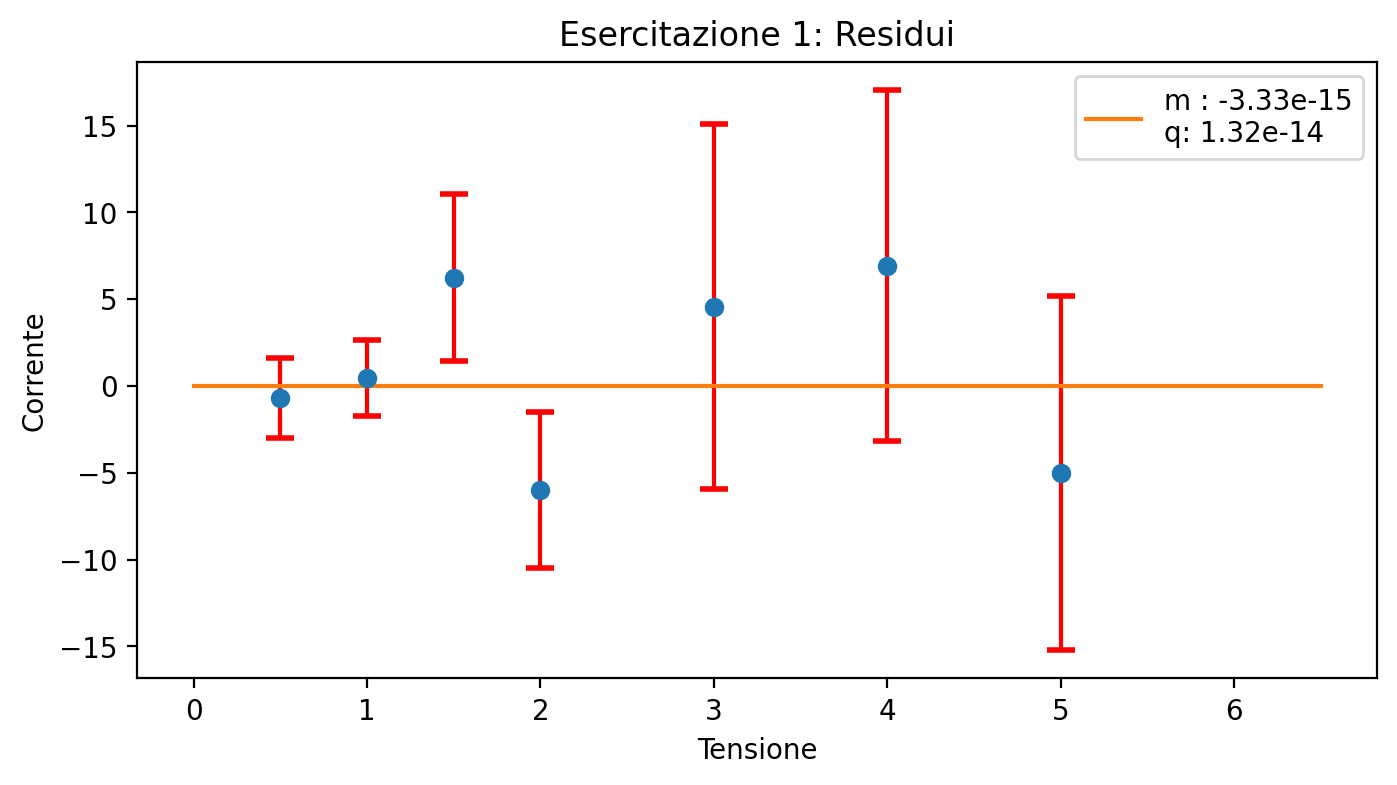

In [6]:
plt.close()
plt.figure(figsize=(8, 4), dpi = 200)

residuals = np.array(dati)
residuals[:, 1] = (y - fit(x)) 

# Plot the points
plt.errorbar(residuals[:, 0], residuals[:, 1], yerr=residuals[:,2], fmt='o', ecolor='red', capsize=5, capthick=2, linestyle='None')

# Label the axes
plt.xlabel('Tensione')
plt.ylabel('Corrente')

# Set the title of the plot
plt.title('Esercitazione 1: Residui')


m_res, stdm_res, q_res, stdq_res, cov_res = mmq(residuals)
xpoints = (0, 6.5)
ypoints = (q_res, 6.5*m_res + q_res)
plt.plot(xpoints, ypoints, label = "m : %.2e" % m_res + "\nq: %.2e" % q_res)

# Display the plot
plt.legend()
plt.show()

L'ipotesi nulla in questo caso è
$$
H_0 : y = m_0 x + q_0
$$
dove $m_0 = \hat{m}$ e $q_0 = \hat{q}$

In [7]:
# Finds the critical zone of the chi_n^2 test by bisection
def findCriticalZone(alpha, n):

    probability = np.float64(0)
    steps = 100

    marginOfError = 0.0001
    lower = 1.0 - alpha - marginOfError
    upper = 1.0 - alpha + marginOfError

    x_0 = np.float64(0)
    inf = np.float64(0)     # inteval used in bisection
    sup = np.float64(10*n)  
    x = np.float64(10*n)    # output variable

    chi_n = lambda y : (np.pow(y, (n/2.0 - 1))*np.exp(-y/2.0))/(np.pow(2.0, n/2.0) * gamma(n/2.0))
    
    for iterations in range (100):
        points = np.linspace(x_0, x, num=steps)
    
        # Probability
        probability = integrate.trapezoid(chi_n(points), points)


        # if iterations%10 == 0:
        #     print(f"{iterations} \t Probability = {probability} \t x = {x} \t [{inf}, {sup}]")

        if ( (probability >= lower) and (probability <= upper) ):
            return x
        elif (probability >= upper):
            sup = x
            x = (sup + inf)/2
        else:
            inf = x
            x = (sup + inf)/2


In [8]:
# Chi_2 Test
def chi2test(y, yexpected, stdy, alpha):


    t = sum((y - yexpected)**2/ stdy**2 )
    ndf = y.size - 2

    t_alpha = findCriticalZone(alpha, ndf)

    print(f"t_alpha: {t_alpha} \t Range: [{ndf - np.sqrt(2*ndf)},{ndf + np.sqrt(2*ndf)} ]\n")
    print(f"t: {t}")
    isCompatible = (t >= ndf - np.sqrt(2*ndf) and (t <= ndf + np.sqrt(2*ndf)))

    chi_n = lambda y : (np.pow(y, (ndf/2.0 - 1))*np.exp(-y/2.0))/(np.pow(2.0, ndf/2.0) * gamma(ndf/2.0))
    points = np.linspace(0, t, num=1000)
    p = 1 - integrate.trapezoid(chi_n(points), points)


    return isCompatible, t/ndf, p

In [9]:
#print(fun(dati[:,0]))

# print(f"x: {dati[:,0]} => f(x) = {fun(dati[:,0])}")
isCompatible, chi_2_ndf, p = chi2test(dati[:,1], fit(dati[:,0]), dati[:,2], 0.05)

print(f"Test: {isCompatible}\n")
print(f"chi_2/ndf: {chi_2_ndf}\n")
print(f"p-value = {p}")


t_alpha: 11.07177734375 	 Range: [1.8377223398316205,8.16227766016838 ]

t: 4.500295594449977
Test: True

chi_2/ndf: 0.9000591188899953

p-value = 0.47984393189562446
